# Logistic Regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

## Step 1: Business Problem understanding.
- Predict if person can be diabetic or not beased on the values provide.
- - Case 1:: Just with Accuracy 70%

## Step 2: Data Understanding. 
### 2.1 Data Collection

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2.2 Exploratory Data Analysis (EDA)

In [4]:
df["Outcome"].unique()

array([1, 0])

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

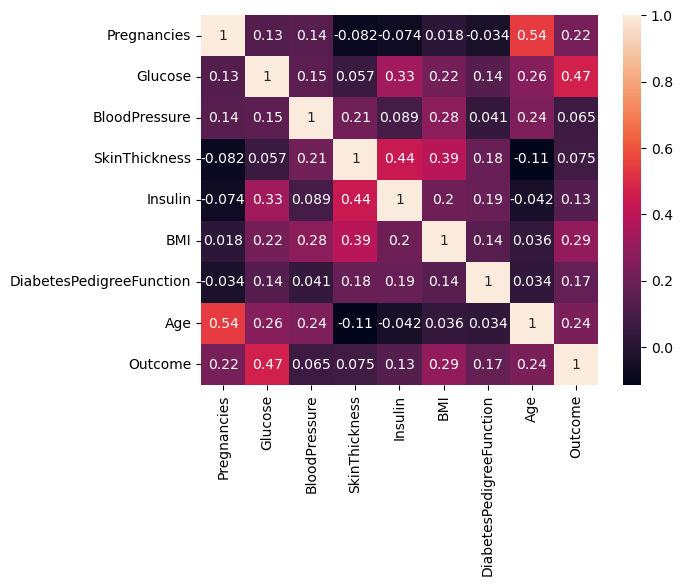

In [8]:
sns.heatmap(df.corr(),annot=True)

## Inference:: 
- From above we can say that this is binary classification problem since we only have 1 or 0 in outcome column.

## Step 3: Data Preprocessing

### 3.1 Data Cleaning

df.isnull().sum()

### 3.2 Data Wrangling.

In [10]:
## No encoding for this data. 

### 3.3 Train-Test Split

In [12]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

## Step 4: Modelling.
### 4.1 Selecting the ML technique to use

- Based on the above steps we will first use LOGISTIC REGRESSION(Baseline Model)

#### 4.1.1 fitting model

In [14]:
from sklearn.linear_model import LogisticRegression # import Ml algo.
log_model = LogisticRegression()                    # Save model to variable
log_model.fit(X_train,y_train)                      # Fit model on train.

LogisticRegression()

#### 4.1.2 Prediction.

In [15]:
ypred_train = log_model.predict(X_train) #predict on train data.
ypred_test = log_model.predict(X_test)   #predict on test data. 

## Step 5: Evalution.

### 5.1 Train and Test Accuracys

In [16]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train,ypred_train)) #train accuracy
print("Test Accuracy::", accuracy_score(y_test,ypred_test)) #test accuracy.

Train Accuracy: 0.7980456026058632
Test Accuracy:: 0.7662337662337663


### 5.2 Cross Validation. 

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model,X,y,cv=5)
print(scores)
scores.mean()

[0.77272727 0.74675325 0.75974026 0.81699346 0.75163399]


0.7695696460402341

### 5.3 Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[85, 15],
       [21, 33]])

### 5.4 Classification Report.

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



### 5.5 AUC

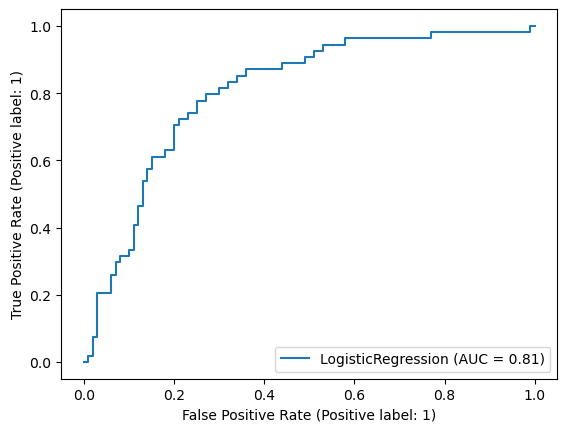

In [21]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,X_test,y_test)
plt.show()